In [60]:
#import
from matplotlib import pyplot as plt
import pandas as pd

In [61]:
#download data set1
species = pd.read_csv('species_info.csv')

In [62]:
#look at data
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [63]:
#look at dimensions of data
species.shape

(5824, 4)

In [64]:
#Explore types
species.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [65]:
#Explore endangerment
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [66]:
#grouping endangerment
species.groupby('conservation_status').scientific_name.nunique().reset_index()

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,Species of Concern,151
3,Threatened,10


In [67]:
#replace nan with no intervention
species.fillna('No Intervention', inplace=True)

In [68]:
#grouping again, looks more accurate
species.groupby('conservation_status').scientific_name.nunique().reset_index()

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,No Intervention,5363
3,Species of Concern,151
4,Threatened,10


In [69]:
#Sorted by scientifc name then placed into a new dataframe
protection = species.groupby('conservation_status').scientific_name.nunique().reset_index().sort_values(by='scientific_name')

In [70]:
protection.head()

,conservation_status,scientific_name
1,In Recovery,4
4,Threatened,10
0,Endangered,15
3,Species of Concern,151
2,No Intervention,5363


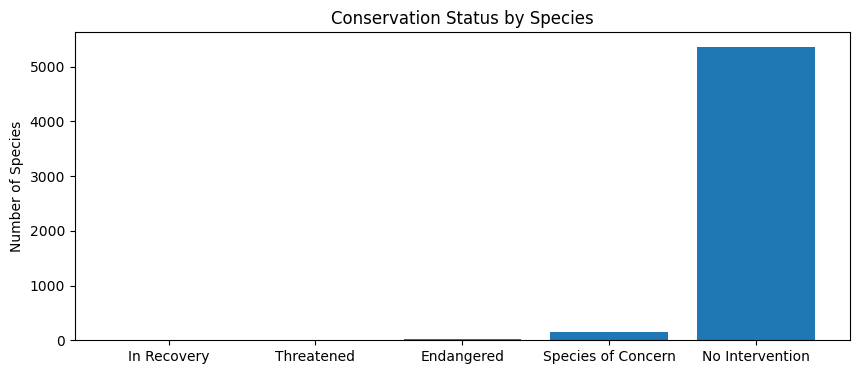

In [71]:
# Bar graph of species endangered vs safe
plt.figure(figsize=(10, 4))
ax = plt.subplot()
plt.bar(range(len(protection)),
        protection.scientific_name.values)
ax.set_xticks(range(len(protection)))
ax.set_xticklabels(protection.conservation_status.values)
plt.ylabel('Number of Species')
plt.title('Conservation Status by Species')
plt.show()

In [72]:
#new column of protected animals
species['is_protected'] = species.conservation_status != 'No Intervention'

In [73]:
#new data set of protected animals
category_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()

In [74]:
category_counts.head(14)

,category,is_protected,scientific_name
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,115
5,Fish,True,11
6,Mammal,False,146
7,Mammal,True,30
8,Nonvascular Plant,False,328
9,Nonvascular Plant,True,5


In [75]:
#create dataframe with true and false columns on whether the animals are protected
category_pivot = category_counts.pivot(columns='is_protected', index='category', values='scientific_name').reset_index()

In [76]:
category_pivot.head(7)

is_protected,category,False,True
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [77]:
# rename columns
category_pivot.columns = ['category', 'not_protected', 'protected']

In [78]:
# create percentage of protected anmials
category_pivot['percent_protected'] = (category_pivot.protected / (category_pivot.protected + category_pivot.not_protected))

In [79]:
category_pivot.head(7)

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,0.088608
1,Bird,413,75,0.153689
2,Fish,115,11,0.087302
3,Mammal,146,30,0.170455
4,Nonvascular Plant,328,5,0.015015
5,Reptile,73,5,0.064103
6,Vascular Plant,4216,46,0.010793


In [80]:
# create contignecy table of amphibians and birds
con_amp_bird = [[7,72],[75,413]]

In [81]:
#import chi test
from scipy.stats import chi2_contingency

In [82]:
# run chi test
chi2_contingency(con_amp_bird)

Chi2ContingencyResult(statistic=np.float64(1.831621580618698), pvalue=np.float64(0.17593613249594683), dof=1, expected_freq=array([[ 11.42504409,  67.57495591],
       [ 70.57495591, 417.42504409]]))

In [83]:
#weak evidence against the null hypothesis 
#Likely no relationship between the two data sets of amphibains and birds

In [84]:
#contingency table of reptiles and mammals
#run chi test
con_rep_mam = [[5,73],[30,146]]
chi2_contingency(con_rep_mam)

Chi2ContingencyResult(statistic=np.float64(4.289183096203645), pvalue=np.float64(0.03835559022969898), dof=1, expected_freq=array([[ 10.7480315,  67.2519685],
       [ 24.2519685, 151.7480315]]))

In [85]:
#strong evidence against the null hypothesis 
#Likely relationship between the two data sets of reptiles and mammals

In [86]:
#import more data
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [87]:
#looking at the attributes of the data 
observations.shape

(23296, 3)

In [88]:
observations.scientific_name.nunique()

5541

In [89]:
observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [90]:
observations.observations.min()

np.int64(9)

In [91]:
observations.observations.max()

np.int64(321)

In [92]:
#create dataframe with observations of bovines by park
obs_by_park_Bovine = Bovine_observations.groupby('park_name').observations.sum().reset_index()
obs_by_park_Bovine.head()

,park_name,observations
0,Bryce National Park,167
1,Great Smoky Mountains National Park,133
2,Yellowstone National Park,504
3,Yosemite National Park,252


In [93]:
#create dataframe with only bovines
Bos_data = species[species.scientific_name.str.contains('Bos')]
Bos_data.head()

,category,scientific_name,common_names,conservation_status,is_protected
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False


In [94]:
# merge bovine data with the main dataframe into bovine observations
Bovine_observations = observations.merge(Bos_data)
Bovine_observations.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected
0,Bos bison,Yosemite National Park,128,Mammal,"American Bison, Bison",No Intervention,False
1,Bos taurus,Bryce National Park,99,Mammal,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
2,Bos bison,Yellowstone National Park,269,Mammal,"American Bison, Bison",No Intervention,False
3,Bos taurus,Yosemite National Park,124,Mammal,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
4,Bos taurus,Yellowstone National Park,235,Mammal,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False


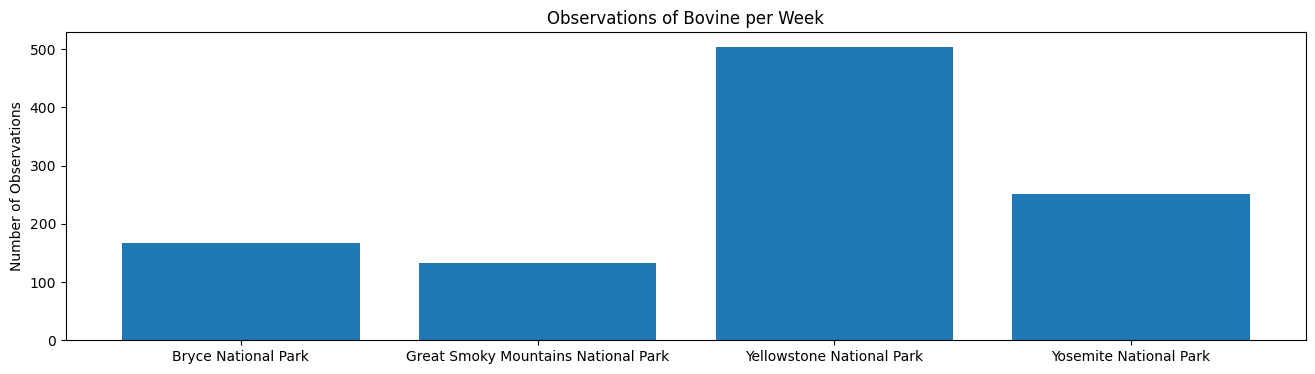

In [95]:
#Bar Graph of Observations of Bovine by Week
plt.figure(figsize=(16, 4))
ax = plt.subplot()
plt.bar(range(len(obs_by_park_Bovine)),
        obs_by_park_Bovine.observations.values)
ax.set_xticks(range(len(obs_by_park_Bovine)))
ax.set_xticklabels(obs_by_park_Bovine.park_name.values)
plt.ylabel('Number of Observations')
plt.title('Observations of Bovine per Week')
plt.show()

In [96]:
#create dataframe with only bisons
Bison_data = species[species.common_names.str.contains('Bison')]
Bison_data.head()

,category,scientific_name,common_names,conservation_status,is_protected
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
3012,Mammal,Bison bison,"Bison, Buffalo",No Intervention,False


In [97]:
#create dataframe with observations of bisons by park
Bison_observations = observations.merge(Bison_data)
obs_by_park_bison = Bison_observations.groupby('park_name').observations.sum().reset_index()
obs_by_park_bison.head()

,park_name,observations
0,Bryce National Park,189
1,Great Smoky Mountains National Park,194
2,Yellowstone National Park,539
3,Yosemite National Park,320


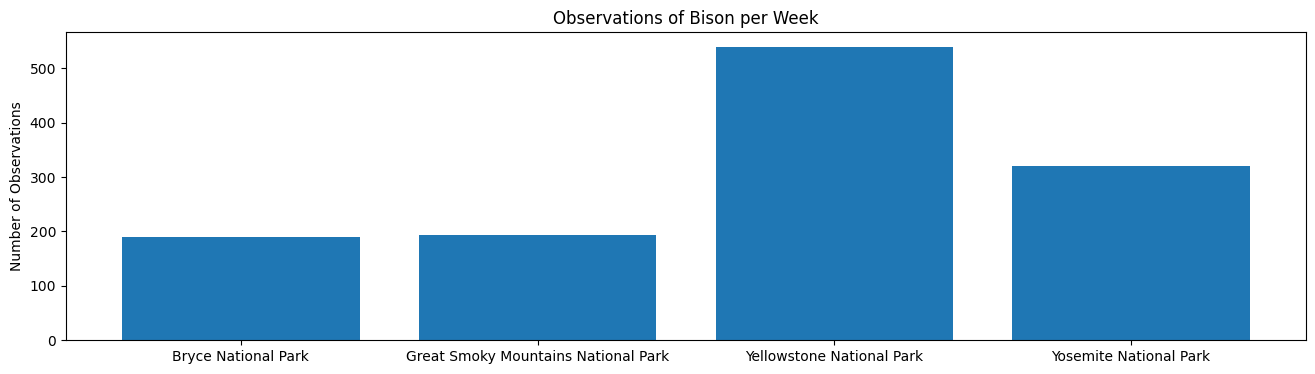

In [98]:
#Bar Graph of Observations of Bison by Week
plt.figure(figsize=(16, 4))
ax = plt.subplot()
plt.bar(range(len(obs_by_park_bison)),
        obs_by_park_bison.observations.values)
ax.set_xticks(range(len(obs_by_park_bison)))
ax.set_xticklabels(obs_by_park_bison.park_name.values)
plt.ylabel('Number of Observations')
plt.title('Observations of Bison per Week')
plt.show()